In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("housing.csv")
data.head(5)
train_size = np.linspace(1, data.shape[0]*0.8 - 1, 9)
print(train_size)
print(np.rint(train_size))


[  1.    49.65  98.3  146.95 195.6  244.25 292.9  341.55 390.2 ]
[  1.  50.  98. 147. 196. 244. 293. 342. 390.]


In [3]:
prices = data['MEDV']
features = data.drop('MEDV',axis=1)
features.head(5)

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [4]:
#train_test_split
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,prices,test_size=0.2,random_state=10)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


ShuffleSplit(489, n_iter=10, test_size=0.2, random_state=10)
[  1  50  98 147 196 244 293 342 390]
************** after **********************************
*******************************


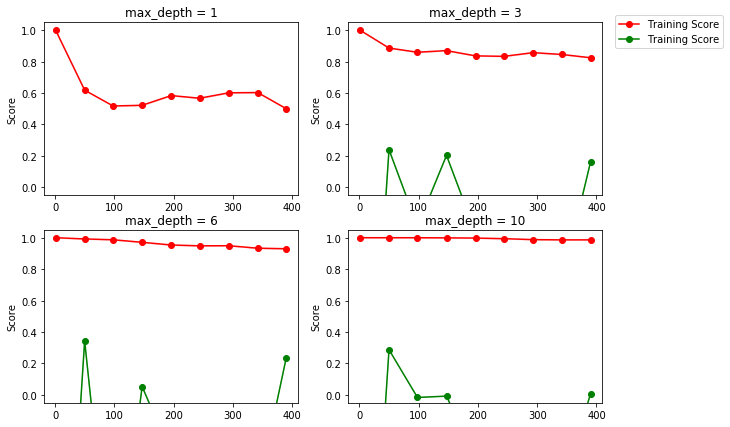

In [10]:
#学习曲线
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.cross_validation import ShuffleSplit

from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


cv = ShuffleSplit(features.shape[0], n_iter = 10, test_size = 0.2, random_state = 10)
print(cv)

'''
for train,test in kfold.split(features,prices):
    print("train:",train)
'''
depth = 5

train_sizes = np.rint(np.linspace(1, data.shape[0]*0.8 - 1, 9)).astype(int)
print(train_sizes)



cv = ShuffleSplit(features.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)
#print(cv)
'''
for train_index, test_index in cv:
    print(train_index,test_index)
'''
train_index = np.arange(0,391)
test_index = np.arange(391,489)
#print("******************** before *****************************")
#print(train_index)
#np.random.shuffle(train_index)
#np.random.shuffle(test_index)
test_cv = [[train_index,test_index]]
#print(type(test_cv))
print("************** after **********************************")
#print(train_index)
print("*******************************")

fig = plt.figure(figsize=(10,7))
for k, depth in enumerate([1,3,6,10]):
    regressor = DecisionTreeRegressor(max_depth=depth)
    #cv 默认是3-folds 交叉验证，cv=10 10-folds 验证
    sizes,train_scores,test_scores = curves.learning_curve(regressor,features,prices,cv=test_cv,train_sizes=train_sizes)
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    ax = fig.add_subplot(2,2,k+1)
    ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Training Score')
    ax.fill_between(sizes, train_mean - train_std,train_mean + train_std, alpha = 0.15, color = 'r')
    ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')
    
    ax.set_ylabel('Score')
    ax.set_title('max_depth = %s'%(depth))
    ax.set_ylim([-0.05, 1.05])

ax.legend(loc='lower left',bbox_to_anchor=(1.05, 2.05),borderaxespad = 0.)


[ 1  2  3  4  5  6  7  8  9 10]
(489, 3)


Text(0.5,1,'Decision Tree Regressor Complexity Performance')

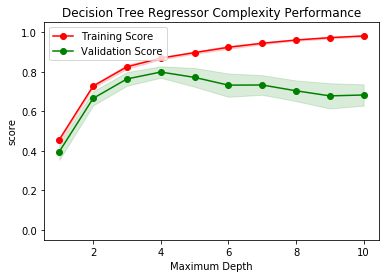

In [6]:
#复杂度曲线  验证曲线
regressor = DecisionTreeRegressor()
param_range = np.arange(1,11)
print(param_range)
print(features.shape)
train_scores,test_scores = curves.validation_curve(regressor,features,prices,param_name="max_depth",param_range=param_range,cv=cv,scoring='r2')

train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.figure()
plt.plot(param_range,train_mean,'o-',color='r',label="Training Score ")
plt.plot(param_range,test_mean,'o-',color='g',label="Validation Score")
plt.fill_between(param_range,train_mean-train_std,train_mean+train_std,alpha=0.15,color = 'r')
plt.fill_between(param_range,test_mean-test_std,test_mean+test_std,alpha=0.15,color='g')
plt.legend(loc="upper left")
plt.xlabel("Maximum Depth")
plt.ylabel("score")
plt.ylim([-0.05,1.05])
plt.title("Decision Tree Regressor Complexity Performance")

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    return r2_score(y_true,y_predict)
cv_sets = ShuffleSplit(features.shape[0], n_iter = 10, test_size = 0.2, random_state = 10)
regressor = DecisionTreeRegressor()
params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
score_fun = make_scorer(performance_metric)
grid = GridSearchCV(regressor, params, scoring=score_fun)
grid = grid.fit(features,prices)
print(grid.best_estimator_)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
